# CreditCardApproval EDA Diana Max

## Setup notebook & fetch data

In [32]:
from ucimlrepo import fetch_ucirepo
#from ydata_profiling import ProfileReport

import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.contingency import association
from scipy.stats import pointbiserialr

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import TargetEncoder, FunctionTransformer, LabelBinarizer, label_binarize, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
credit_approval = fetch_ucirepo(id=27)

X = credit_approval.data.features
y = credit_approval.data.targets
df = credit_approval.data.original

## first look

In [8]:
credit_approval.data.original

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0   -

[690 rows x 16 columns]

In [11]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate

Barplot for categorical variables / Histogram for continuous variables


Suggest one/two strategies for handling missing values.

### A1

[Text(0, 0.5, 'value count')]

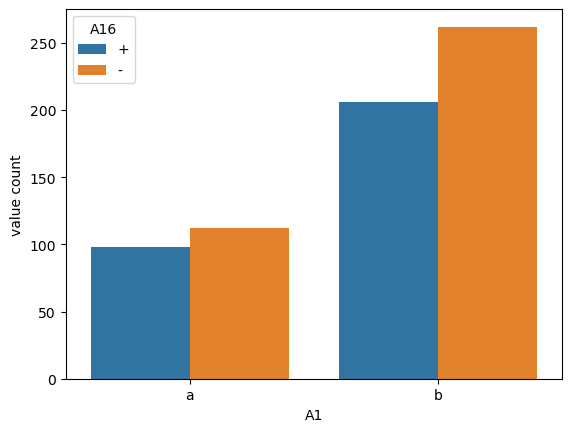

In [256]:
A1 = df[['A1','A16']]

ax = sns.barplot(
    data=A1.reset_index().groupby(['A1','A16']).count().reset_index(),
    x='A1',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

Impute missing values with most frequent category.

### A2

<Axes: xlabel='A2', ylabel='Count'>

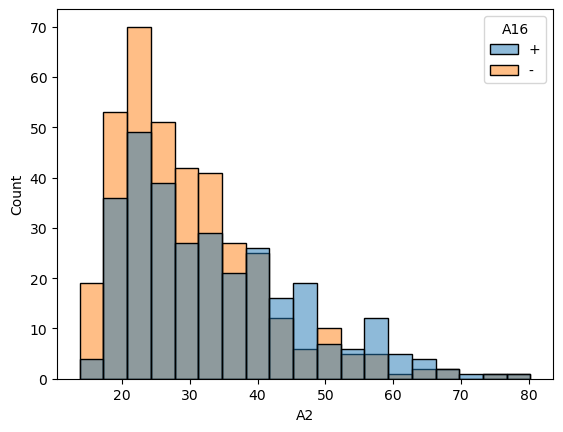

In [254]:
A2 = df[['A2','A16']]
sns.histplot(A2, x='A2', hue='A16')

<Axes: xlabel='A2', ylabel='Count'>

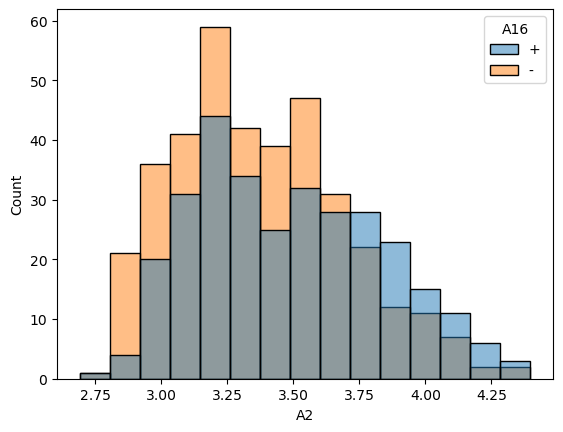

In [255]:
A2 = A2.assign(A2=A2.A2.apply(np.log1p))
sns.histplot(A2, x='A2', hue='A16')

Replace missing values with median.

### A3

<Axes: xlabel='A3', ylabel='Count'>

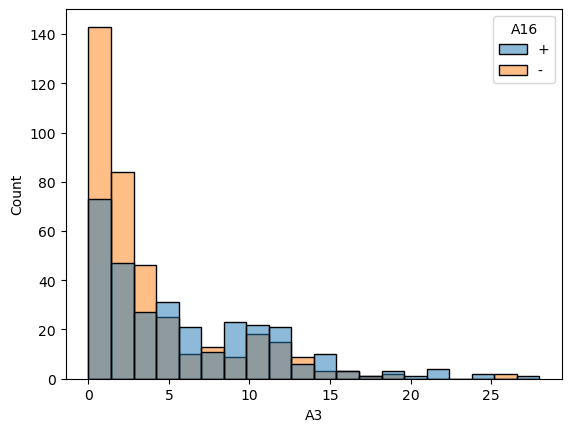

In [252]:
A3 = df[['A3','A16']]
sns.histplot(A3, x='A3', hue='A16')

<Axes: xlabel='A3', ylabel='Count'>

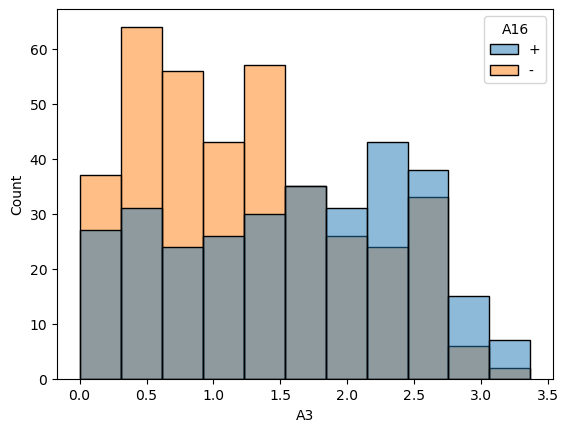

In [253]:
A3 = A3.assign(A3=A3.A3.apply(np.log1p))
sns.histplot(A3, x='A3', hue='A16')

### A4

[Text(0, 0.5, 'value count')]

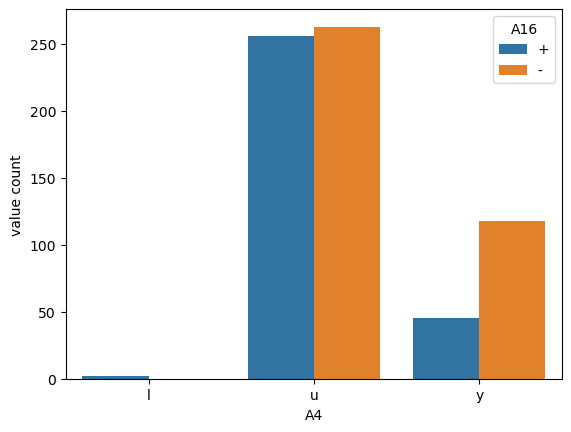

In [258]:
A4 = df[['A4','A16']]

ax = sns.barplot(
    data=A4.reset_index().groupby(['A4','A16']).count().reset_index(),
    x='A4',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A5

[Text(0, 0.5, 'value count')]

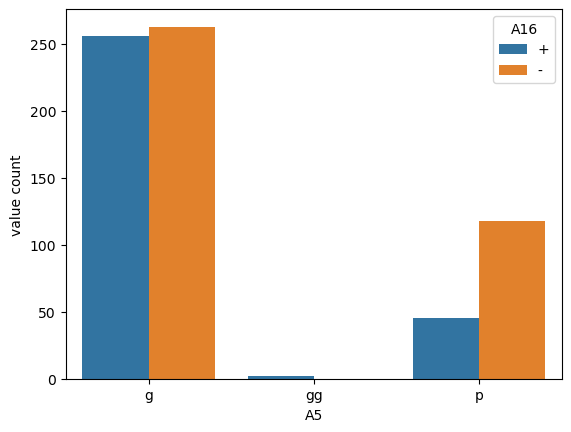

In [259]:
A5 = df[['A5','A16']]

ax = sns.barplot(
    data=A5.reset_index().groupby(['A5','A16']).count().reset_index(),
    x='A5',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A6

[Text(0, 0.5, 'value count')]

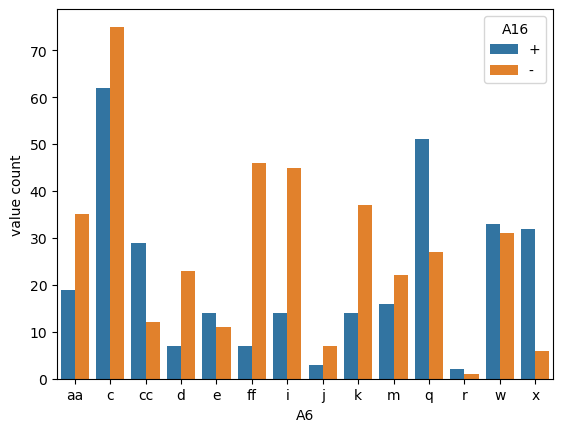

In [208]:
ax = sns.barplot(
    data=df.reset_index().groupby(['A6','A16']).count().reset_index(),
    x='A6',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

In [ ]:
# PCA

### A7

[Text(0, 0.5, 'value count')]

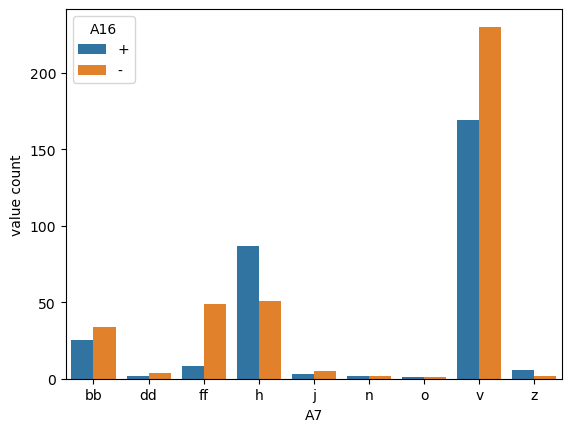

In [209]:
ax = sns.barplot(
    data=df.reset_index().groupby(['A7','A16']).count().reset_index(),
    x='A7',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A8

<Axes: xlabel='A8', ylabel='Count'>

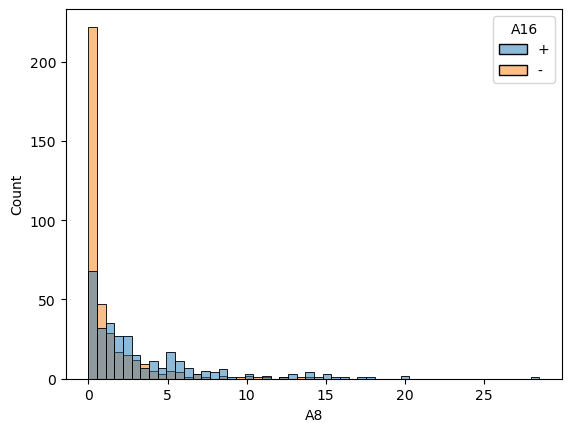

In [261]:
A8 = df[['A8','A16']]
sns.histplot(A8, x='A8', hue='A16')

<Axes: xlabel='A8', ylabel='Count'>

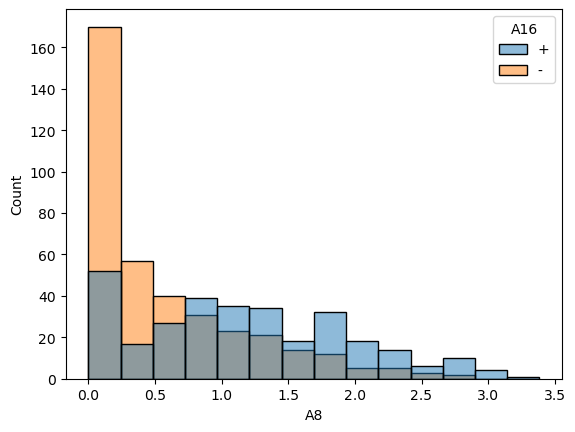

In [262]:
A8 = A8.assign(A8=A8.A8.apply(np.log1p))
sns.histplot(A8, x='A8', hue='A16')

### A9

[Text(0, 0.5, 'value count')]

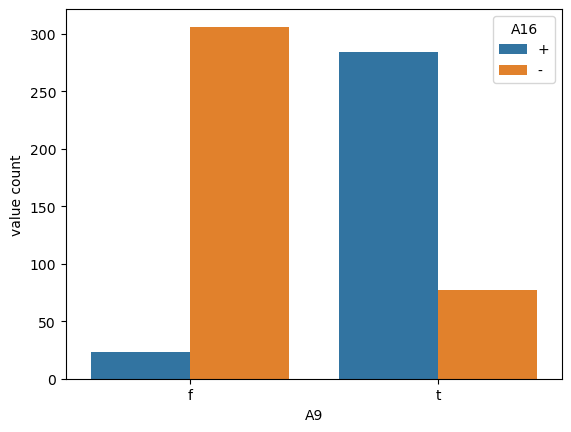

In [263]:
A9 = df[['A9','A16']]

ax = sns.barplot(
    data=A9.reset_index().groupby(['A9','A16']).count().reset_index(),
    x='A9',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A10

[Text(0, 0.5, 'value count')]

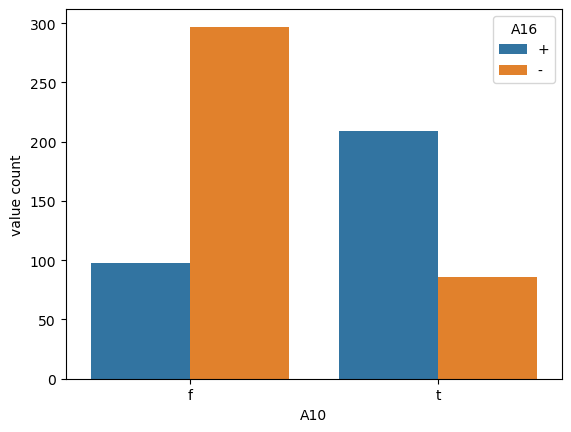

In [264]:
A10 = df[['A10','A16']]

ax = sns.barplot(
    data=A10.reset_index().groupby(['A10','A16']).count().reset_index(),
    x='A10',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A11

<Axes: xlabel='A11', ylabel='Count'>

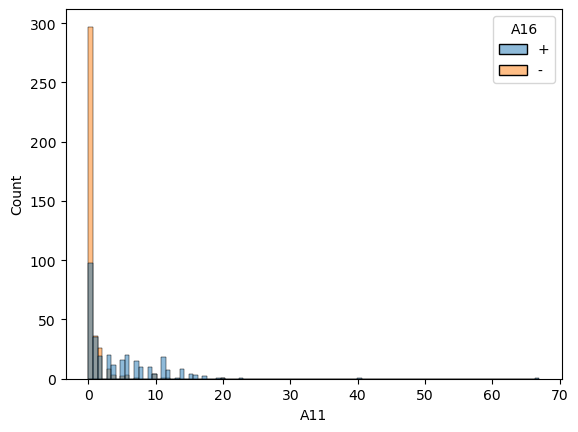

In [265]:
A11 = df[['A11','A16']]
sns.histplot(A11, x='A11', hue='A16')

<Axes: xlabel='A11', ylabel='Count'>

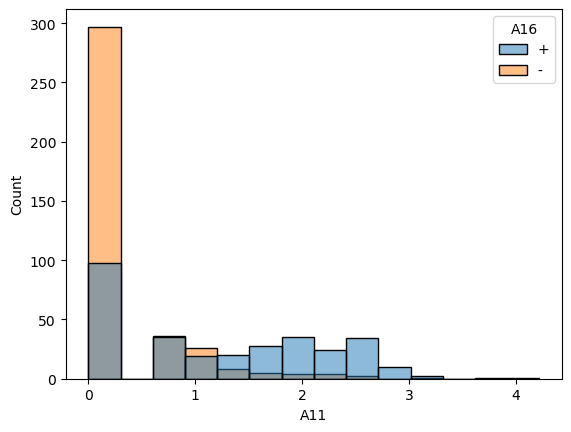

In [266]:
A11 = A11.assign(A11=A11.A11.apply(np.log1p))
sns.histplot(A11, x='A11', hue='A16')

### A12

[Text(0, 0.5, 'value count')]

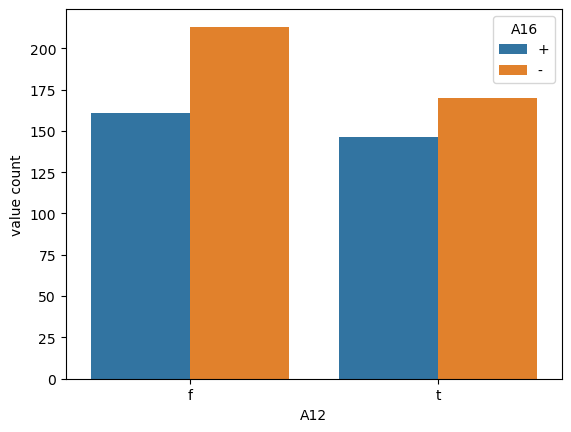

In [267]:
A12 = df[['A12','A16']]

ax = sns.barplot(
    data=A12.reset_index().groupby(['A12','A16']).count().reset_index(),
    x='A12',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A13

[Text(0, 0.5, 'value count')]

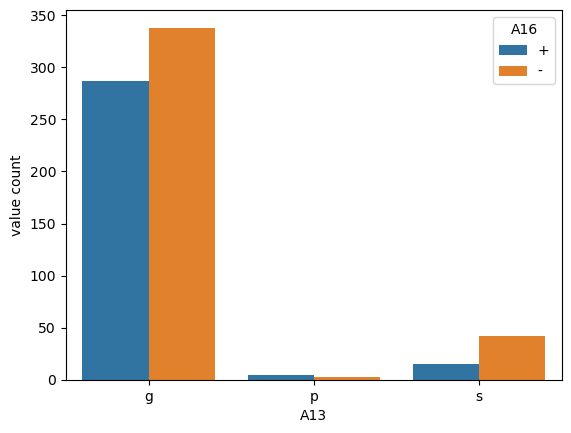

In [268]:
A13 = df[['A13','A16']]

ax = sns.barplot(
    data=A13.reset_index().groupby(['A13','A16']).count().reset_index(),
    x='A13',
    y='index',
    hue='A16')
ax.set(ylabel='value count')

### A14

<Axes: xlabel='A14', ylabel='Count'>

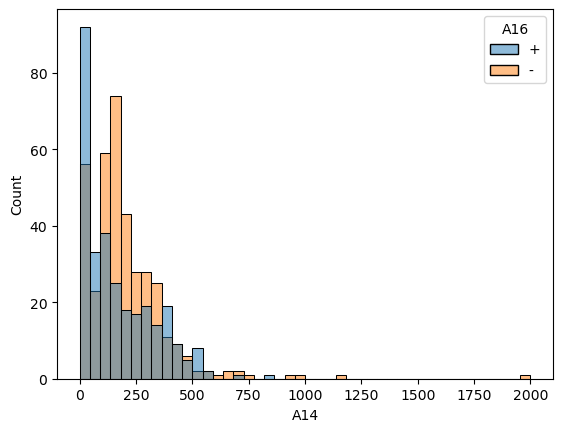

In [269]:
A14 = df[['A14','A16']]
sns.histplot(A14, x='A14', hue='A16')

<Axes: xlabel='A14', ylabel='Count'>

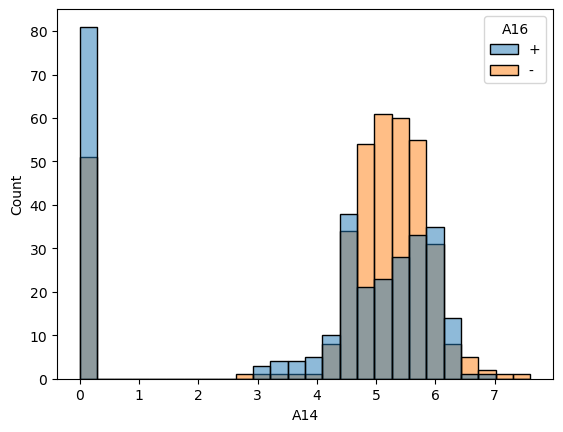

In [270]:
A14 = A14.assign(A14=A14.A14.apply(np.log1p))
sns.histplot(A14, x='A14', hue='A16')

### A15

<Axes: xlabel='A15', ylabel='Count'>

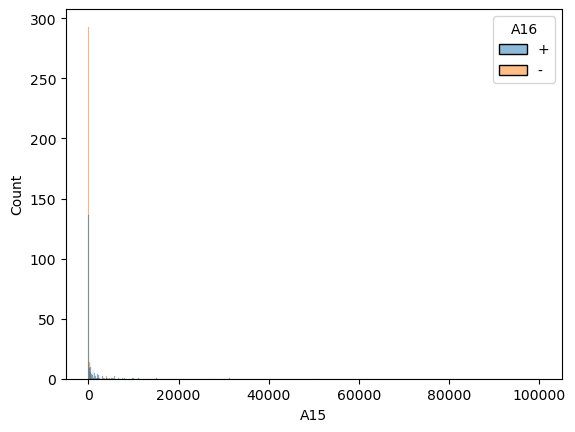

In [280]:
A15 = df[['A15','A16']]
sns.histplot(A15, x='A15', hue='A16')

In [281]:
A15.A15.sort_values()

0           0
362         0
360         0
359         0
358         0
        ...  
243     26726
6       31285
65      50000
132     51100
317    100000
Name: A15, Length: 690, dtype: int64

<Axes: xlabel='A15', ylabel='Count'>

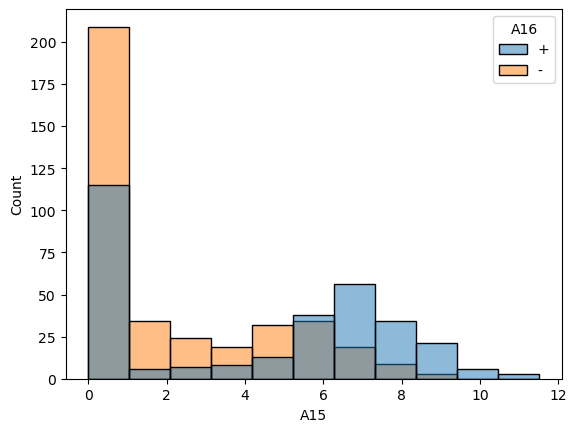

In [282]:
A15 = A15.assign(A15=A15.A15.apply(np.log1p))
sns.histplot(A15, x='A15', hue='A16')

### A16

In [284]:
df.A16.value_counts()

A16
-    383
+    307
Name: count, dtype: int64

## NaN Analysis

In [465]:
credit_approval.variables[['name','missing_values']]

name missing_values
0   A16             no
1   A15             no
2   A14            yes
3   A13             no
4   A12             no
5   A11             no
6   A10             no
7    A9             no
8    A8             no
9    A7            yes
10   A6            yes
11   A5            yes
12   A4            yes
13   A3             no
14   A2            yes
15   A1            yes

In [466]:
df.isna().any(axis=1).sum()/df.shape[0]

0.0536231884057971

About 5% of the data contains missing values.

## comments on variables

A3 let be

A4 binary, 6 missing values
summarize categories y and l to 'not-u' category, replace missing valuses with most frequent

A5 discarded, correlation of 1 with A4

A6 realtively uniformly disributed over 13 categories, not really sure what to do
maybe discard, because correlated by >.5 with A7
(maybe PCA with A7) (alternatively: frequency encode)

A7 9 categries
summarise to categories v, h, other. encode missing values as most frequent

A8 let be

A9 let be (note: highly correlated with target)

A10 let be

A11 log1p, replace with median

A12 let be

A13 summarise to g and not-g

A14 log1p, replace with median

A15 log1p, replace with median

A16 target, let be

mim-max scale all continuious variables
onehot encoder all categorical variables

## Correlations with target

Correlate every variables with target:
- categorical data: Cramers V
- continuous data: Point biserial correlation

In [168]:
target = y.replace({'+':1,'-':0})

### categorical

In [159]:
categorical_variables = credit_approval.variables[(credit_approval.variables.type == 'Categorical') & (credit_approval.variables.role == 'Feature')].name.values
s = pd.Series(index=categorical_variables)


for var in categorical_variables:
    s[var] = association(pd.crosstab(df[var], df.A16))

s

A13    0.115417
A12    0.031625
A10    0.458301
A9     0.720407
A7     0.257157
A6     0.379978
A5     0.195842
A4     0.195842
A1     0.024634
dtype: float64

<Axes: >

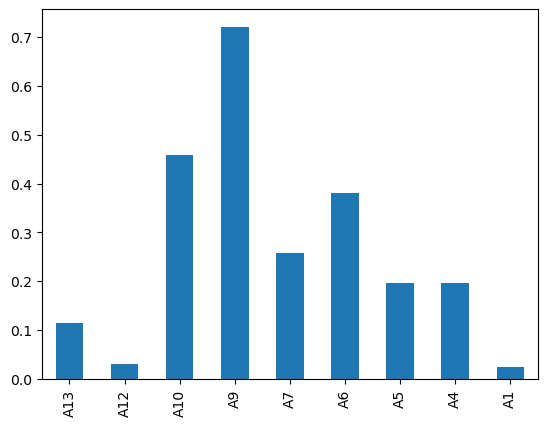

In [162]:
s.plot(kind='bar')

### continuous

In [203]:
continuous_variables = credit_approval.variables[(credit_approval.variables.type == 'Continuous') & (credit_approval.variables.role == 'Feature')].name.values

s = pd.Series(index=continuous_variables)


for var in continuous_variables:
    s[var] = pointbiserialr(target[~df[var].isna()].values.ravel(), df[var].dropna().values).statistic

s

A15    0.175657
A14   -0.100935
A11    0.406410
A8     0.322475
A3     0.206294
A2     0.162881
dtype: float64

<Axes: >

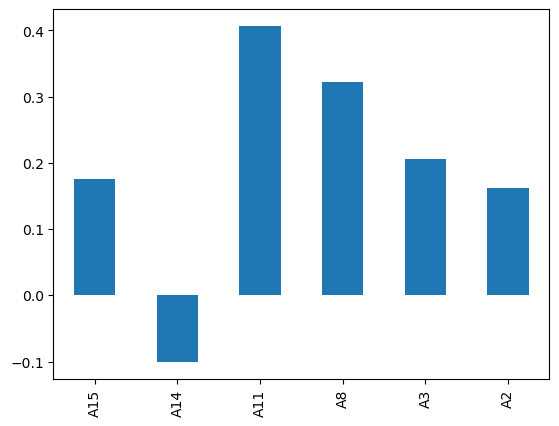

In [204]:
s.plot(kind='bar')

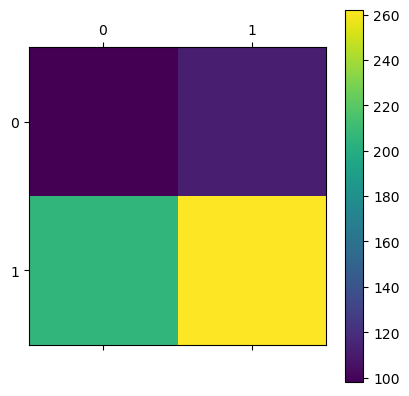

In [122]:
plt.matshow(c)
plt.colorbar()

## Mutual information between variables

In [ ]:
"""
Compute mutual information in every commbination of two variables. We don't use product-momment or rank correlation since it assumes at least a monotonic relationship, which is a assumption we don't want to make at this point.

"""

### tweak data

In this context, there is no reasonable way known to the authers to correlate a multi-class (k > 2) categorical variable to a continuous variable.

- Therefore, we already do some tweaking of the data here, applying reasonable ways to allow us to correlate as many features as possible. Namely: Make A4, A5 and A13 binary variables by by summarising classes.

- Also, we apply the log transform to features with a strongly skewed distribution (A3, A8, A11, A14, A15) already, to make the correlations more meaningfull, since we are not (!) doing rank correlations.

- A obvious way to deal with A6 and A7 is target encoding, we will also already apply that here, for the sake of not leaving A6 and A7 completely out of the feature-feature correlations. This is however still EDA and not the feature engineering part.

- Since only 5% of the data contains missing values, we will for now throw out any column that has missing values.

In [ ]:
df

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0   -

[690 rows x 16 columns]

In [ ]:
discrete_features_mask = (credit_approval.variables[1:].type == 'Categorical').values

df_tweaked = df.dropna()

mutual_info_classif(df_tweaked.A13.values[:,np.newaxis], df_tweaked.A16.values.ravel())#, discrete_features=discrete_features_mask)

### old code

In [ ]:
On

In [19]:
df_tweaked.A1

0      b
1      a
2      a
3      b
4      b
      ..
685    b
686    a
687    a
688    b
689    b
Name: A1, Length: 653, dtype: object

In [31]:
label_binarize(df_tweaked.A1, classes=['b']);

In [29]:
df_tweaked.A1

0      b
1      a
2      a
3      b
4      b
      ..
685    b
686    a
687    a
688    b
689    b
Name: A1, Length: 653, dtype: object

In [27]:
df_tweaked.A4

0      u
1      u
2      u
3      u
4      u
      ..
685    y
686    u
687    y
688    u
689    u
Name: A4, Length: 653, dtype: object

In [ ]:
label_binarize(df_tweaked.A4, classes=['u'])

In [42]:
column_tweaker = make_column_transformer(
    (
        OneHotEncoder(sparse_output=False, drop='first'),
        ['A1']
    ),
    (
        FunctionTransformer(lambda col: label_binarize(col, classes=['u'])),
        ['A4']
    ),
    (
        FunctionTransformer(lambda col: label_binarize(col, classes=['g'])),
        ['A5']
    ),
    (
        # becoming numeric column
        TargetEncoder(),
        ['A6', 'A7']
    ),
    (
        FunctionTransformer(lambda col: label_binarize(col, classes=['g'])),
        ['A13']
    ),
    (
        FunctionTransformer(np.log1p),
        ['A3','A8','A11','A14','A15']
    ),

    # leave everything else untouched
    remainder='passthrough'
)

df_tweaked = df.copy(deep=True).dropna(how='any')
var_names = df.columns

df_tweaked = pd.DataFrame(column_tweaker.fit_transform(df_tweaked, y=df_tweaked.A16), columns=['A1','A4','A5','A6','A7','A13','A3','A8','A11','A14','A15', 'A2','A9','A10','A12' ,'A16'])
df_tweaked = df_tweaked[var_names] # bring columns in right order again
df_tweaked

A1     A2        A3 A4 A5        A6        A7        A8 A9 A10  \
0    1.0  30.83       0.0  1  1  0.469734  0.573205   0.81093  t   t   
1    0.0  58.67  1.697449  1  1  0.358879  0.351791  1.396245  t   t   
2    0.0   24.5  0.405465  1  1  0.347939  0.358692  0.916291  t   f   
3    1.0  27.83  0.932164  1  1  0.469734  0.573205  1.558145  t   t   
4    1.0  20.17   1.89085  1  1   0.47973  0.578491  0.996949  t   f   
..   ...    ...       ... .. ..       ...       ...       ... ..  ..   
648  1.0  21.08  2.405593  0  0  0.343421  0.358692   0.81093  f   f   
649  0.0  22.67  0.559616  1  1   0.54211  0.566284  1.098612  f   t   
650  0.0  25.25  2.674149  0  0  0.838007  0.871429  1.098612  f   t   
651  1.0  17.92   0.18648  1  1  0.626407  0.575562  0.039221  f   f   
652  1.0   35.0  1.475907  1  1  0.562943  0.358692  2.228939  f   f   

          A11 A12 A13       A14       A15 A16  
0    0.693147   f   1  5.313206       0.0   +  
1     1.94591   f   1   3.78419  6.329721   +  
2         0.0   f   1  5.638355  6.715383   +  
3    1.791759   t   1  4.615121  1.386294   +  
4         0.0   f   0  4.795791       0.0   +  
..        ...  ..  ..       ...       ...  ..  
648       0.0   f   1   5.56452       0.0   -  
649  1.098612   t   1  5.303305  5.978886   -  
650  0.693147   t   1  5.303305  0.693147   -  
651       0.0   f   1  5.638355  6.621406   -  
652       0.0   t   1       0.0       0.0   -  

[653 rows x 16 columns]

In [45]:
df.dropna()

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0   -

[653 rows x 16 columns]

In [33]:
category = credit_approval.variables[['name','type']].set_index('name')
category

type
name             
A16   Categorical
A15    Continuous
A14    Continuous
A13   Categorical
A12   Categorical
A11    Continuous
A10   Categorical
A9    Categorical
A8     Continuous
A7    Categorical
A6    Categorical
A5    Categorical
A4    Categorical
A3     Continuous
A2     Continuous
A1    Categorical

In [ ]:
association(pd.crosstab(df.A4, df.A16))

pointbiserialr(df[~df['A4'].isna()].values.ravel(), df[var].dropna().values).statistic

In [ ]:
"""

"""
#create 15x15 matrix

correlations_matrix = pd.DataFrame(index=var_names, columns=var_names)

for var1 in var_names:
    for var2 in var_names:
        
        # use mutual_info_regression if targeted variable is continuous
        
        # use mutual_info_regression if targeted variable is categorical
            


correlations_matrix